In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Style configuration
plt.style.use('ggplot')
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

In [4]:
# Define a color palette
colors = sns.color_palette("viridis", 10)


Loading Excel File

In [5]:
# Load the Excel file
file_path = 'DCAMM NU Project Spending Detail Without Dictionary.xlsx'
df = pd.read_excel(file_path)

In [6]:
# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nColumn names:")
print(df.columns.tolist())

Dataset Overview:
Number of rows: 40429
Number of columns: 50

Column names:
['PID', 'budget_fiscal_year', 'fiscal_year', 'fiscal_period', 'doc_identifier', 'ref_doc_identifier', 'vendor_invoice_date', 'service_from_date', 'service_to_date', 'vendor_customer_code', 'legal_name', 'program', 'program_name', 'phase', 'phase_name', 'acceptance_date', 'PayClass', 'First_Pay', 'Project_Month', 'Project_Year', 'Month', 'ProgPhase', 'PayClass_First_Pay', 'PayClass Month', 'PayClass Month Adjusted', 'First_FY', 'Project_FY', 'PayClass_First_FY', 'PayClass FY', 'Expended', 'TPC 95%', '%TPC 95%', 'TPC_95% Payclass', '%PayClass 95', 'Construction Procurement', 'Exec', 'Exec Name', 'Construction Type', 'Agy', 'Agy Name', 'City', 'County', 'Description', 'TPC', 'TPC Category', 'TPC Cat Num', 'SQFT', 'Capital Investment Category', 'Migrated', 'ebuild']


In [31]:
# Display first few rows to understand the data structure
print("\nFirst 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


PID  budget_fiscal_year  fiscal_year  fiscal_period        doc_identifier    ref_doc_identifier vendor_invoice_date service_from_date service_to_date vendor_customer_code            legal_name  program                                       program_name phase phase_name acceptance_date PayClass  First_Pay  Project_Month  Project_Year     Month    ProgPhase PayClass_First_Pay  PayClass Month  PayClass Month Adjusted  First_FY  Project_FY  PayClass_First_FY  PayClass FY  Expended    TPC 95%  %TPC 95%  TPC_95% Payclass  %PayClass 95 Construction Procurement Exec                      Exec Name Construction Type  Agy                     Agy Name        City     County               Description        TPC       TPC Category  TPC Cat Num  SQFT  Capital Investment Category  Migrated  ebuild
0  BCC0701                2008         2008              5  DISB1107070000224904  INTFINV0000000017827          2007-11-01        2007-08-16      2007-10-16         VC6000159097  NAULT ARCHITECTS INC  BCC0701  Exterior Masonry Repair at Berkshire Community...   HS1        HS1      2007-11-07   Design 2007-11-07              1             1  November  BCC0701-HS1         2007-11-07               1                       11      2008           1               2008            1  17500.00 4454527.61      0.00         561452.90          0.03            Ch. 149 (DBB)  BHE  EXECUTIVE OFFICE OF EDUCATION            Repair  BCC  BERKSHIRE COMMUNITY COLLEGE  PITTSFIELD  BERKSHIRE  Exterior Masonry Repairs 4663625.31  $0 to $10 Million            1   NaN                          NaN     False   False
1  BCC0701                2008         2008              6  DISB1212070000303330  INTFINV0000000018270          2007-12-03        2007-11-15      2007-11-15         VC6000159097  NAULT ARCHITECTS INC  BCC0701  Exterior Masonry Repair at Berkshire Community...   HS1        HS1      2007-12-12   Design 2007-11-07              2             1  December  BCC0701-HS1         2007-11-07               2                       12      2008           1               2008            1   2584.56 4454527.61      0.00         561452.90          0.00            Ch. 149 (DBB)  BHE  EXECUTIVE OFFICE OF EDUCATION            Repair  BCC  BERKSHIRE COMMUNITY COLLEGE  PITTSFIELD  BERKSHIRE  Exterior Masonry Repairs 4663625.31  $0 to $10 Million            1   NaN                          NaN     False   False
2  BCC0701                2008         2008              8  DISB0213080000414647  INTFINV0000000019076          2008-02-06        2008-01-08      2008-01-08         VC6000159097  NAULT ARCHITECTS INC  BCC0701  Exterior Masonry Repair at Berkshire Community...   HS1        HS1      2008-02-13   Design 2007-11-07              4             1  February  BCC0701-HS1         2007-11-07               4                       14      2008           1               2008            1   1221.00 4454527.61      0.00         561452.90          0.00            Ch. 149 (DBB)  BHE  EXECUTIVE OFFICE OF EDUCATION            Repair  BCC  BERKSHIRE COMMUNITY COLLEGE  PITTSFIELD  BERKSHIRE  Exterior Masonry Repairs 4663625.31  $0 to $10 Million            1   NaN                          NaN     False   False
3  BCC0701                2008         2008              9  DISB0320080000484549  INTFINV0000000019536          2008-03-12        2008-03-12      2008-03-12         VC6000159097  NAULT ARCHITECTS INC  BCC0701  Exterior Masonry Repair at Berkshire Community...   HS1        HS1      2008-03-20   Design 2007-11-07              5             1     March  BCC0701-HS1         2007-11-07               5                       15      2008           1               2008            1  17500.00 4454527.61      0.00         561452.90          0.03            Ch. 149 (DBB)  BHE  EXECUTIVE OFFICE OF EDUCATION            Repair  BCC  BERKSHIRE COMMUNITY COLLEGE  PITTSFIELD  BERKSHIRE  Exterior Masonry Repairs 4663625.31  $0 to $10 Million            1   NaN                          NaN     False   False
4  BCC0

In [32]:
# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})
display(missing_df[missing_df['Missing Values'] > 0].sort_values('Missing Values', ascending=False))



Missing values per column:


Missing Values  Percentage (%)
Capital Investment Category           40429          100.00
SQFT                                  23615           58.41
vendor_invoice_date                   13066           32.32
ref_doc_identifier                    12886           31.87
vendor_customer_code                  12792           31.64
legal_name                            12792           31.64
Construction Type                      6937           17.16
service_from_date                      6591           16.30
service_to_date                        6591           16.30
County                                 3272            8.09
City                                   1163            2.88
phase_name                              266            0.66

In [33]:
# Numeric columns analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nSummary statistics for numeric columns:")
display(df[numeric_columns].describe())


Summary statistics for numeric columns:


budget_fiscal_year  fiscal_year  fiscal_period  Project_Month  Project_Year  PayClass Month  PayClass Month Adjusted  First_FY  Project_FY  PayClass_First_FY  PayClass FY    Expended      TPC 95%  %TPC 95%  TPC_95% Payclass  %PayClass 95          TPC  TPC Cat Num      SQFT  Capital Investment Category
count            40429.00     40429.00       40429.00       40429.00      40429.00        40429.00                 40429.00  40429.00    40429.00           40429.00     40429.00    40429.00     40429.00  40429.00          40429.00      40429.00     40429.00     40429.00  16814.00                         0.00
mean              2015.21      2015.33           6.72          47.51          4.42           37.31                    42.99   2011.34        4.87            2012.19         4.02    89537.11  45960678.88      0.01        8625571.46          0.02  49265195.51         2.82  96024.35                          NaN
std                  4.06         4.05           3.55          30.78          2.57           29.73                    30.01      4.87        2.57               4.91         2.52   393071.90  54648507.71      0.02       21678930.66          0.05  58693351.75         1.41 123775.38                          NaN
min               2005.00      2005.00           1.00           1.00          1.00            1.00                     1.00   2005.00        1.00            2005.00         1.00 -4337682.94     20529.50     -0.07          -3540.00         -0.59     23704.50         1.00      0.00                          NaN
25%               2012.00      2012.00           4.00          25.00          3.00           14.00                    20.00   2007.00        3.00            2008.00         2.00     1076.40  10279809.49      0.00         372551.25          0.00  10753027.20         2.00      0.00                          NaN
50%               2015.00      2015.00           7.00          44.00          4.00           32.00                    38.00   2011.00        5.00            2012.00         4.00     2961.60  28341882.85      0.00        1374638.62          0.00  30226624.62         3.00  47000.00                          NaN
75%               2018.00      2018.00          10.00          64.00          6.00           53.00                    58.00   2015.00        6.00            2015.00         5.00    16280.02  69591132.69      0.00        5076539.56          0.01  72622534.59         4.00 146984.00                          NaN
max               2025.00      2025.00          15.00         188.00         16.00          188.00                   197.00   2024.00       16.00            2025.00        16.00 10500000.00 280024794.70      1.00      245216352.48          1.00 296511379.16         6.00 428000.00                          NaN

In [16]:
# Define cost columns
cost_columns = ['Expended', 'TPC 95%', 'TPC_95% Payclass']
total_project_cost = ['TPC 95%']
individual_expense = ['Expended']

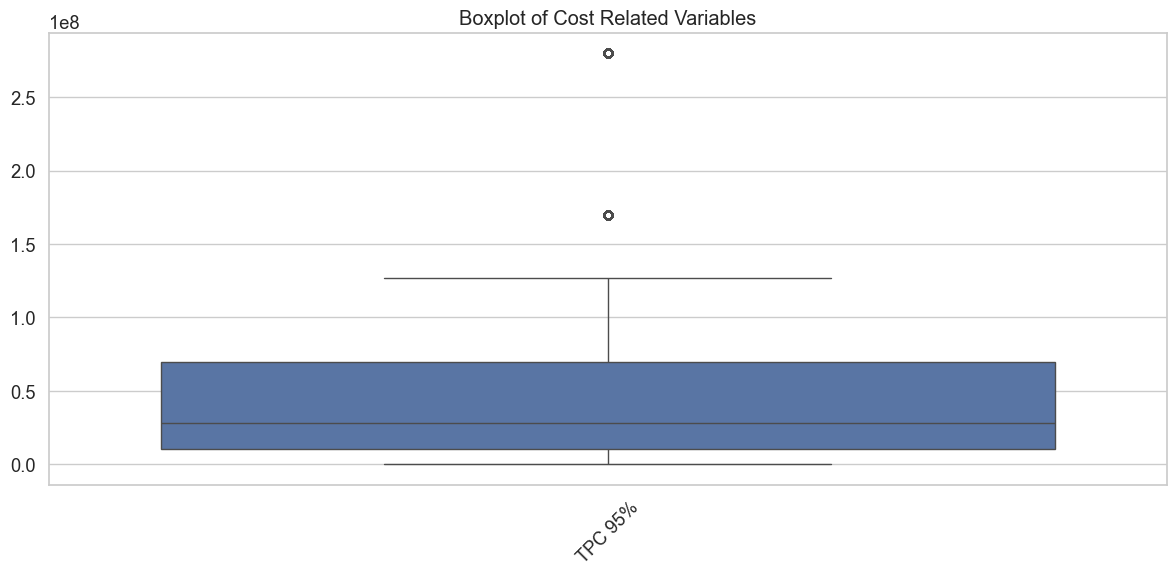

In [48]:
# Check for outliers in cost columns
if total_project_cost:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[total_project_cost])
    plt.title('Boxplot of Cost Related Variables')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

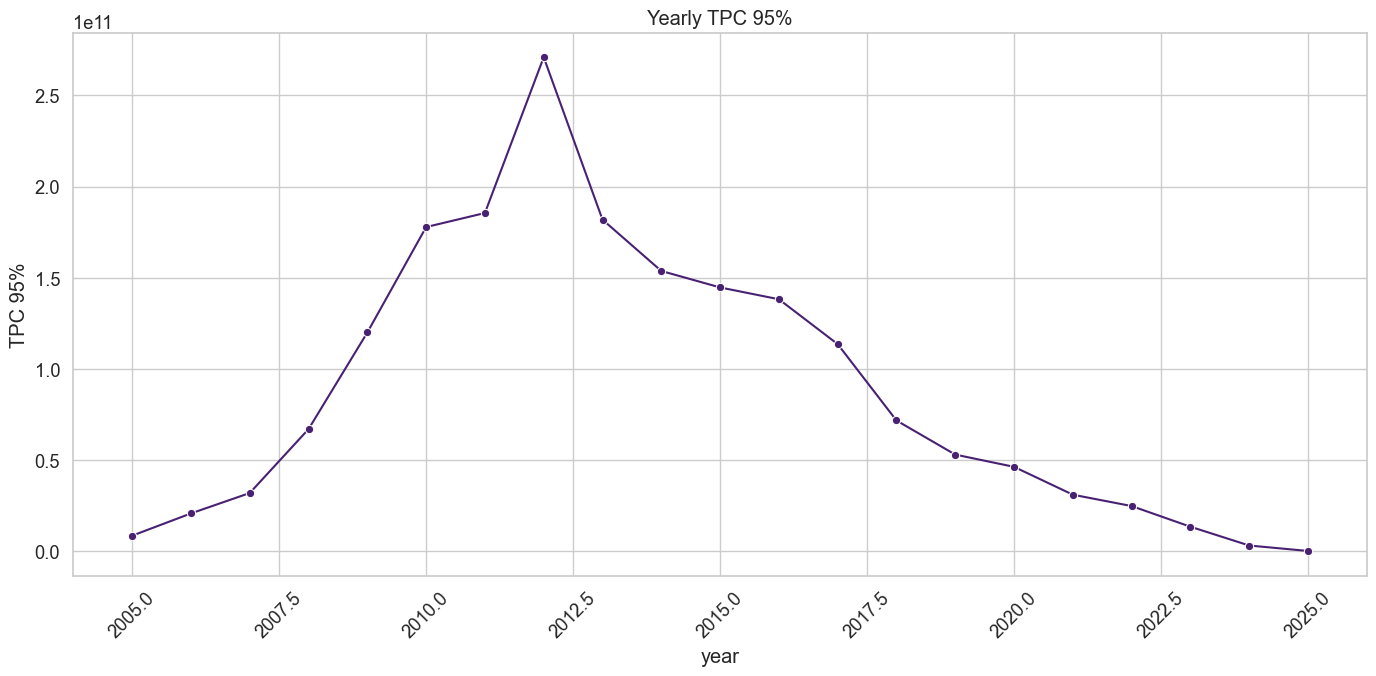

In [50]:
# Time series analysis if construction year is available
construction_year = ['budget_fiscal_year']
if construction_year:
    construction_year = construction_year[0]
    # Ensure the column is in the right format for grouping
    if pd.api.types.is_datetime64_dtype(df[construction_year]):
        df['year'] = df[construction_year].dt.year
    else:
        df['year'] = df[construction_year]
    
    # Group by year and calculate statistics
    yearly_stats = df.groupby('year')[total_project_cost].sum().reset_index()
    
    # Plot yearly trends
    plt.figure(figsize=(14, 7))
    for i, col in enumerate(total_project_cost):
        plt.subplot(1, len(total_project_cost), i+1)
        sns.lineplot(data=yearly_stats, x='year', y=col, marker='o', color=colors[i])
        plt.title(f'Yearly {col}')
        plt.grid(True)
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C:\Users\002931816\AppData\Local\Temp\ipykernel_252\1605981154.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\002931816\AppData\Local\Temp\ipykernel_252\1605981154.py:39: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



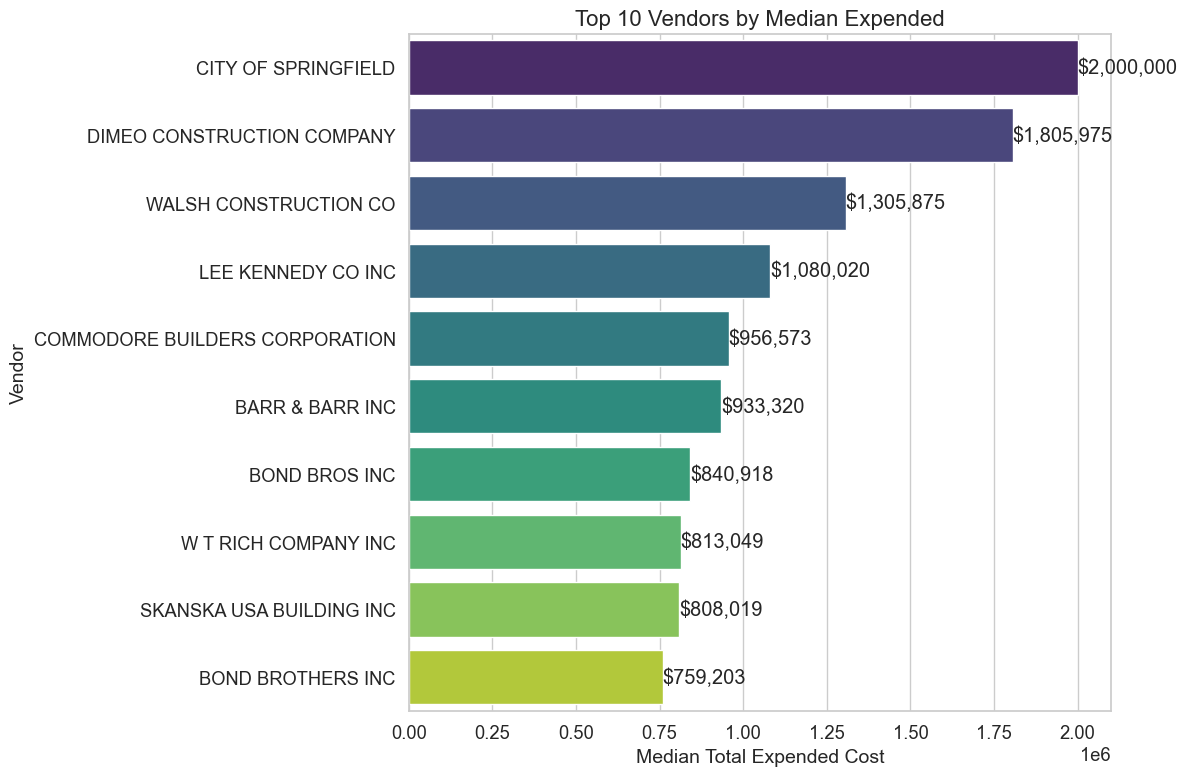

In [21]:
# Vendor analysis
vendor_col = 'legal_name'  # Define the vendor column name directly
cost_col = 'Expended'       # Define the total project cost column name directly

if vendor_col in df.columns and cost_col in df.columns:
    # Get top vendors by median total project cost
    top_vendors_by_median = df.groupby(vendor_col)[cost_col].median().reset_index()
    top_vendors_by_median = top_vendors_by_median.sort_values(by=cost_col, ascending=False)
    
    # Take top 10 vendors
    top_vendors_by_median = top_vendors_by_median.head(10)
    
    # Create horizontal bar plot
    plt.figure(figsize=(12, 8))
    
    # Use barh for horizontal bars (better for long vendor names)
    ax = sns.barplot(data=top_vendors_by_median, 
                    x=cost_col, 
                    y=vendor_col, 
                    palette='viridis')
    
    plt.title(f'Top 10 Vendors by Median {cost_col}', fontsize=16)
    plt.xlabel('Median Total Expended Cost', fontsize=14)
    plt.ylabel('Vendor', fontsize=14)
    plt.grid(True, axis='x')
    
    # Add value labels to the bars
    for i, v in enumerate(top_vendors_by_median[cost_col]):
        ax.text(v + 0.1, i, f'${v:,.0f}', va='center')
    
    # Adjust vendor name length for better display
    def shorten_vendor_name(name, max_length=30):
        if isinstance(name, str) and len(name) > max_length:
            return name[:max_length] + '...'
        return name
    
    # Update y-tick labels
    y_labels = [shorten_vendor_name(name) for name in top_vendors_by_median[vendor_col]]
    ax.set_yticklabels(y_labels)
    
    plt.tight_layout()
    plt.show()

C:\Users\002931816\AppData\Local\Temp\ipykernel_12676\2498837996.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=project_counts.index, y=project_counts.values, palette='viridis')


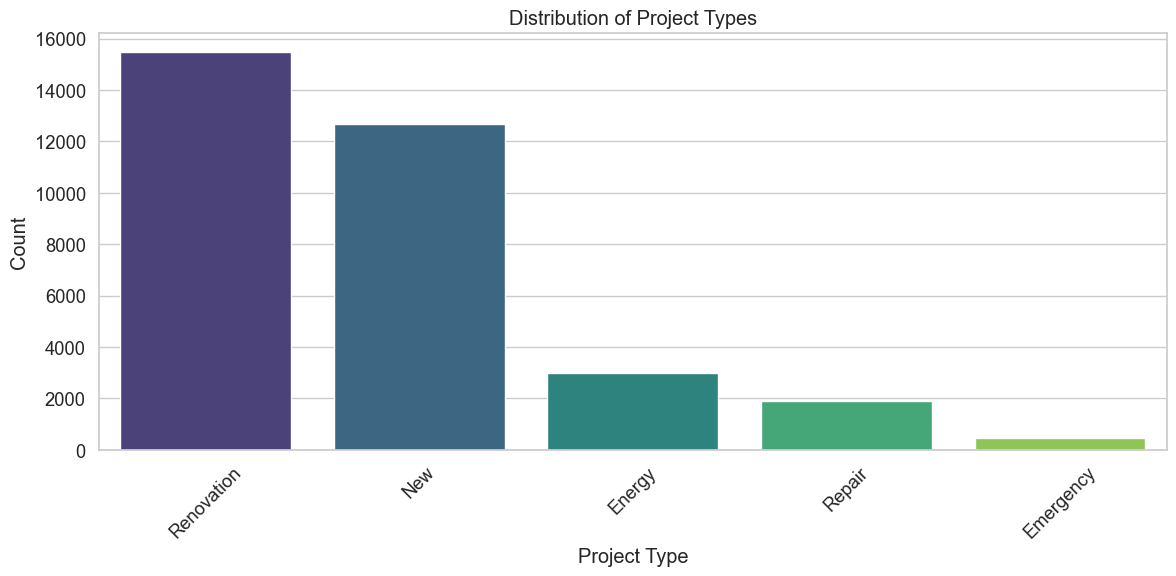

In [17]:
# Project type analysis
project_type = ['Construction Type']
if project_type:
    project_type = project_type[0]
    # Distribution of project types
    plt.figure(figsize=(12, 6))
    project_counts = df[project_type].value_counts()
    sns.barplot(x=project_counts.index, y=project_counts.values, palette='viridis')
    plt.title('Distribution of Project Types')
    plt.ylabel('Count')
    plt.xlabel('Project Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Cost by project type
    project_costs = df.groupby(project_type)[cost_columns].sum().reset_index()
    
    # Create subplots for each cost column
    fig = make_subplots(rows=len(cost_columns), cols=1, 
                       subplot_titles=[f'{col} by Project Type' for col in cost_columns])
    
    for i, col in enumerate(cost_columns):
        fig.add_trace(
            go.Bar(x=project_costs[project_type], y=project_costs[col], name=col),
            row=i+1, col=1
        )
    
    fig.update_layout(height=300*len(cost_columns), width=800, title_text="Costs by Project Type")
    fig.show()


C:\Users\002931816\AppData\Local\Temp\ipykernel_252\2667401830.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




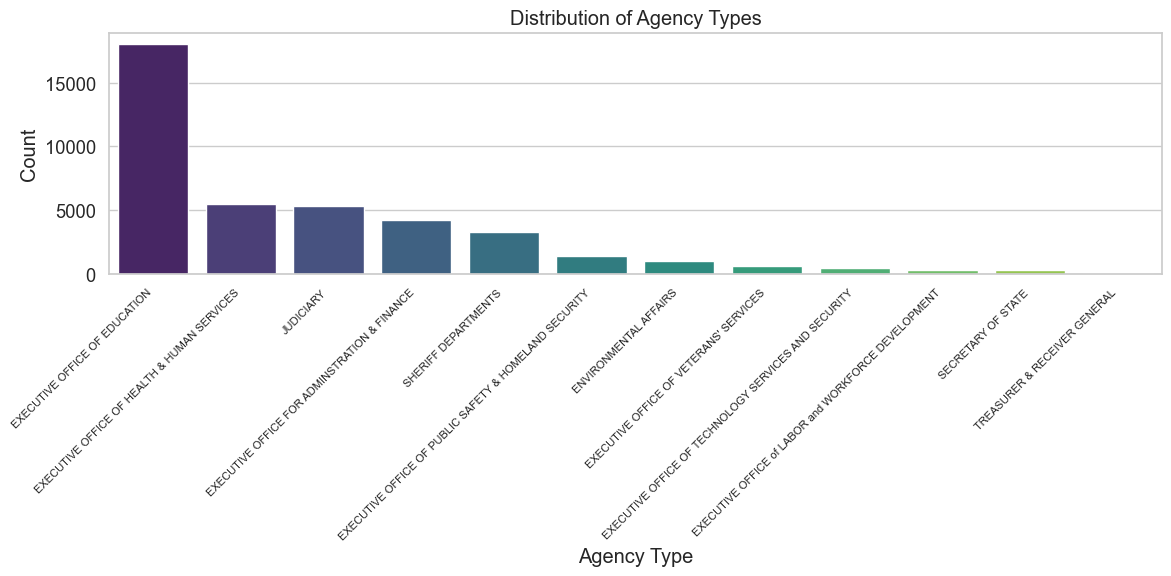

In [ ]:
# Project type analysis
agency_col = 'Exec Name'  # Define the column name directly as a string

if agency_col in df.columns:  # Check if the column exists in dataframe
    # Distribution of project types
    plt.figure(figsize=(12, 6))
    project_counts = df[agency_col].value_counts()
    sns.barplot(x=project_counts.index, y=project_counts.values, palette='viridis')
    plt.title('Distribution of Agency Types')
    plt.ylabel('Count')
    plt.xlabel('Agency Type')
    plt.xticks(rotation=45, fontsize=8, ha='right')
    plt.tight_layout()
    plt.show()
    
    # Cost by project type/agency
    project_costs = df.groupby(agency_col)['TPC 95%'].median().reset_index()
    
    # Create a single bar chart since we're only analyzing one cost column
    fig = go.Figure()
    
    # Add a bar trace for the TPC 95% by agency
    fig.add_trace(
        go.Bar(x=project_costs[agency_col], y=project_costs['TPC 95%'], 
               name='TPC 95%',
               marker_color='royalblue')
    )
    
    fig.update_layout(
        height=600, 
        width=800, 
        title_text="Costs by Agency Type",
        xaxis_title="Agency Type",
        yaxis_title="Total Project Cost (TPC 95%)"
    )
    
    fig.show()

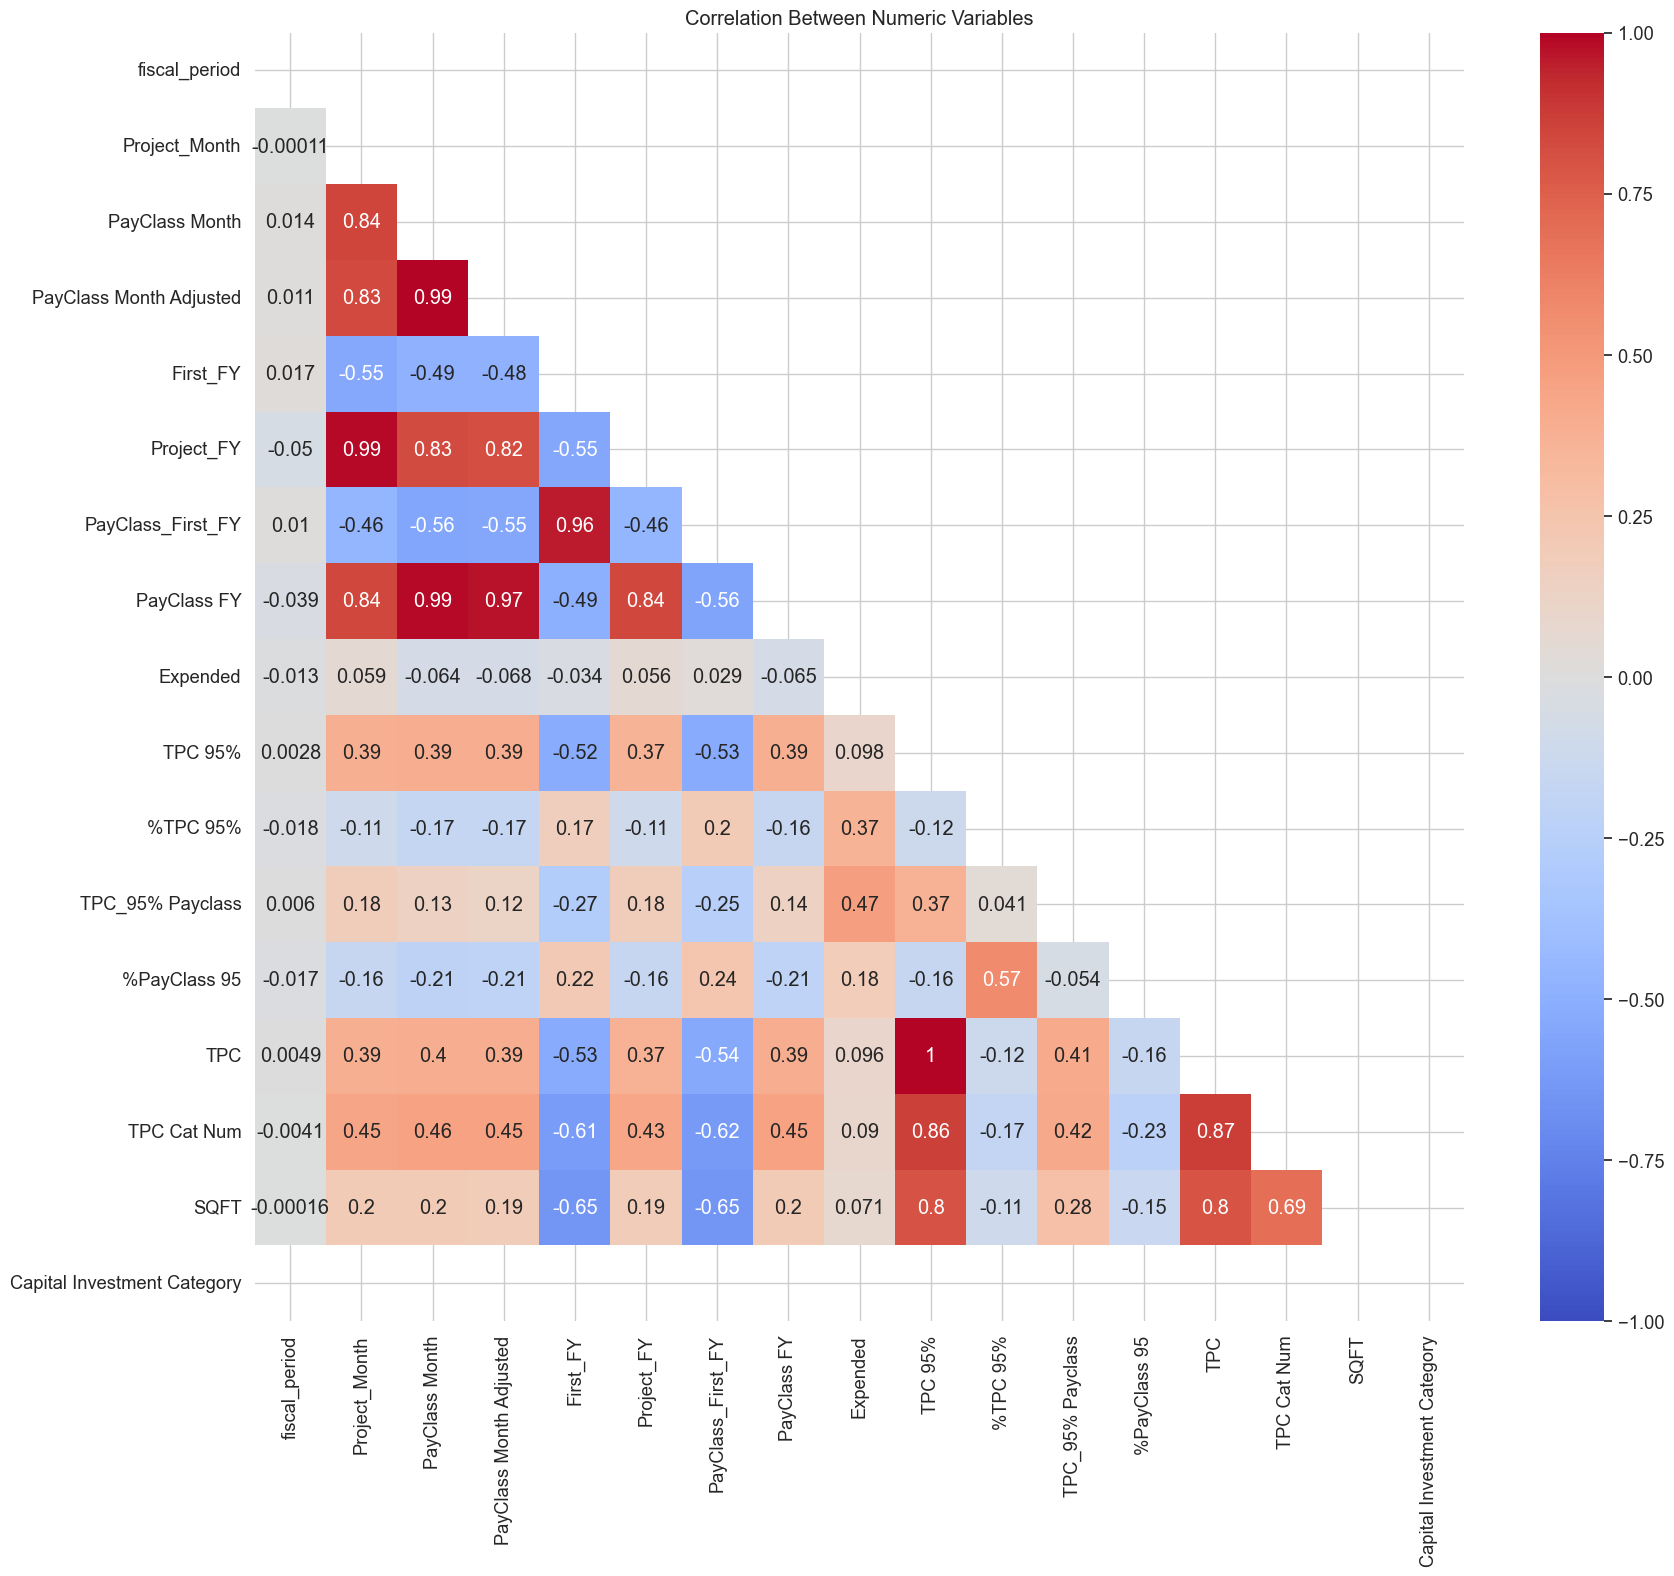

In [18]:
# Correlation analysis
correlation_cols = numeric_columns
if len(correlation_cols) > 1:
    plt.figure(figsize=(18, 16))
    correlation = df[correlation_cols].corr()
    mask = np.triu(correlation)
    sns.heatmap(correlation, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
    plt.title('Correlation Between Numeric Variables')
    plt.tight_layout()
    plt.show()

In [54]:
# Advanced visualizations with plotly
# Create a scatter plot of project cost vs. construction year colored by project type
if 'TPC 95%' in df.columns and 'acceptance_date' in df.columns and 'Construction Type' in df.columns:
    fig = px.scatter(df, x='acceptance_date', y='TPC 95%', 
                    color='Construction Type', size='TPC 95%',
                    hover_name='Construction Type', log_y=True,
                    title='Project Cost vs Construction Year by Project Type')
    fig.show()


In [42]:
# Create a sunburst chart for hierarchical view of spending
if 'Construction Type' in df.columns and 'legal_name' in df.columns and 'TPC 95%' in df.columns:
    fig = px.sunburst(df, path=['Construction Type', 'legal_name'], values='TPC 95%',
                     title='Hierarchical View of Spending by Project Type and Vendor')
    fig.show()

ValueError: ('None entries cannot have not-None children', Construction Type                 nan
legal_name           AC & R SUPPLY CO
Name: 20147, dtype: object)

In [ ]:
# Create interactive dashboard template
from IPython.display import HTML

html_template = """
<div style="background-color:#f5f5f5; padding:20px; border-radius:10px; margin-top:20px;">
    <h2 style="text-align:center; color:#333;">Construction Projects Dashboard</h2>
    <p style="text-align:center;">This dashboard provides an overview of the construction projects data.</p>
    <div style="display:flex; justify-content:space-around; flex-wrap:wrap;">
        <div style="background-color:white; padding:15px; border-radius:5px; margin:10px; width:45%;">
            <h3>Key Metrics</h3>
            <ul>
                <li>Total Projects: {total_projects}</li>
                <li>Total Spending: ${total_spending:,.2f}</li>
                <li>Average Project Cost: ${avg_cost:,.2f}</li>
                <li>Number of Vendors: {vendor_count}</li>
            </ul>
        </div>
        <div style="background-color:white; padding:15px; border-radius:5px; margin:10px; width:45%;">
            <h3>Project Types</h3>
            <ul>
                {project_types_list}
            </ul>
        </div>
    </div>
</div>
"""

In [ ]:
# Extract metrics for the dashboard
if 'total_project_cost' in df.columns and 'project_type' in df.columns and vendor_col:
    total_projects = len(df)
    total_spending = df['total_project_cost'].sum() if 'total_project_cost' in df.columns else 0
    avg_cost = df['total_project_cost'].mean() if 'total_project_cost' in df.columns else 0
    vendor_count = df[vendor_col].nunique() if vendor_col else 0
    
    project_types = df['project_type'].value_counts()
    project_types_html = ""
    for pt, count in project_types.items():
        project_types_html += f"<li>{pt}: {count} projects</li>"
    
    dashboard_html = html_template.format(
        total_projects=total_projects,
        total_spending=total_spending,
        avg_cost=avg_cost,
        vendor_count=vendor_count,
        project_types_list=project_types_html
    )
    
    display(HTML(dashboard_html))


In [ ]:
# Final insights and recommendations
print("\n--- Key Insights ---")
if cost_columns:
    expensive_projects = df.nlargest(5, cost_columns[0])
    print(f"Top 5 most expensive projects:")
    display(expensive_projects[['project_type', cost_columns[0]]])

if vendor_col and cost_columns:
    top_vendors_data = df.groupby(vendor_col)[cost_columns].sum().sort_values(cost_columns[0], ascending=False).head(5)
    print(f"Top 5 vendors by {cost_columns[0]}:")
    display(top_vendors_data)

if project_type_col and cost_columns:
    project_type_data = df.groupby(project_type_col)[cost_columns].agg(['sum', 'mean', 'count']).head()
    print(f"Summary by project type:")
    display(project_type_data)

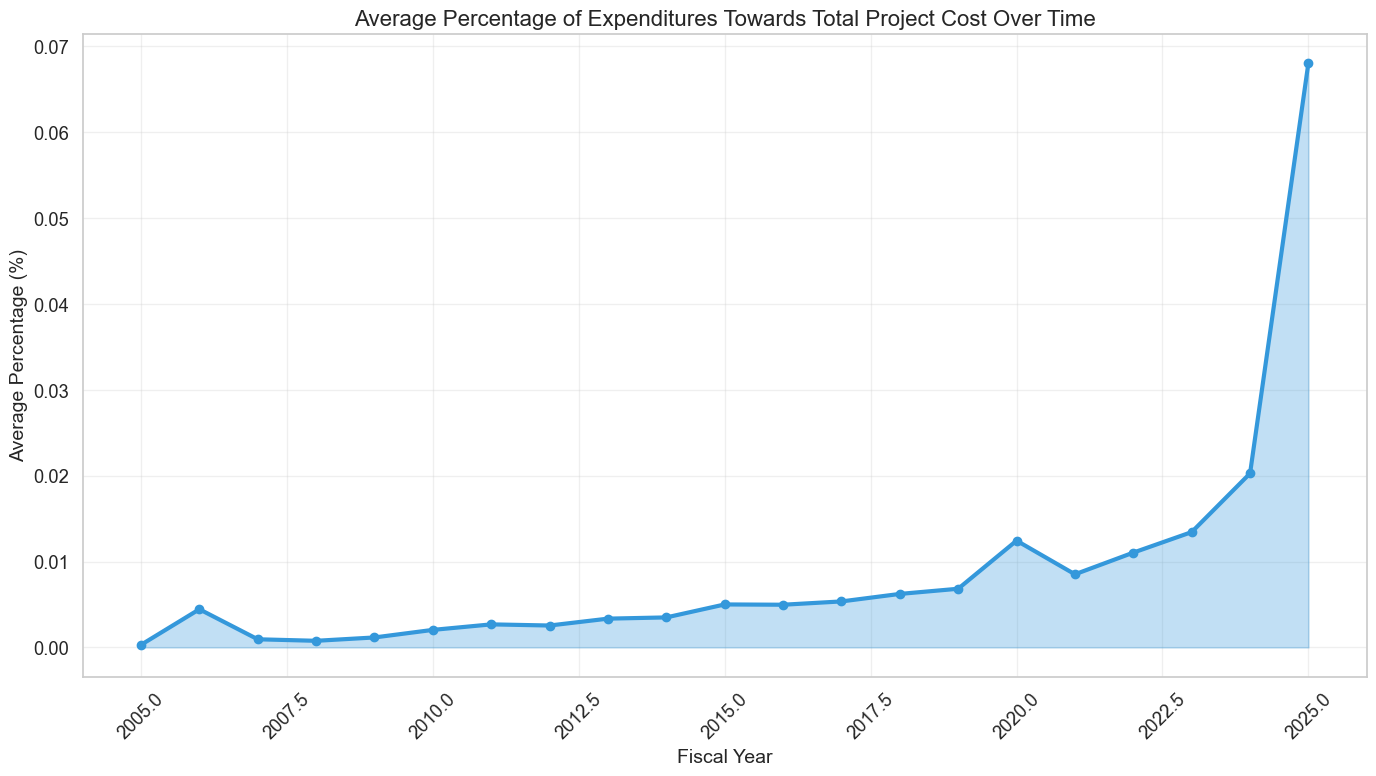

In [8]:
# 1. Average percentage distribution over time (area chart)
plt.figure(figsize=(14, 8))
time_percentage = df.groupby('fiscal_year')['%TPC 95%'].mean().reset_index()
plt.plot(time_percentage['fiscal_year'], time_percentage['%TPC 95%'], 
         marker='o', linewidth=3, color='#3498db')
plt.fill_between(time_percentage['fiscal_year'], time_percentage['%TPC 95%'], 
                 alpha=0.3, color='#3498db')
plt.title('Average Percentage of Expenditures Towards Total Project Cost Over Time', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Average Percentage (%)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\002931816\AppData\Local\Temp\ipykernel_10752\3630483714.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fiscal_year', y='%TPC 95%', data=df, palette='viridis')


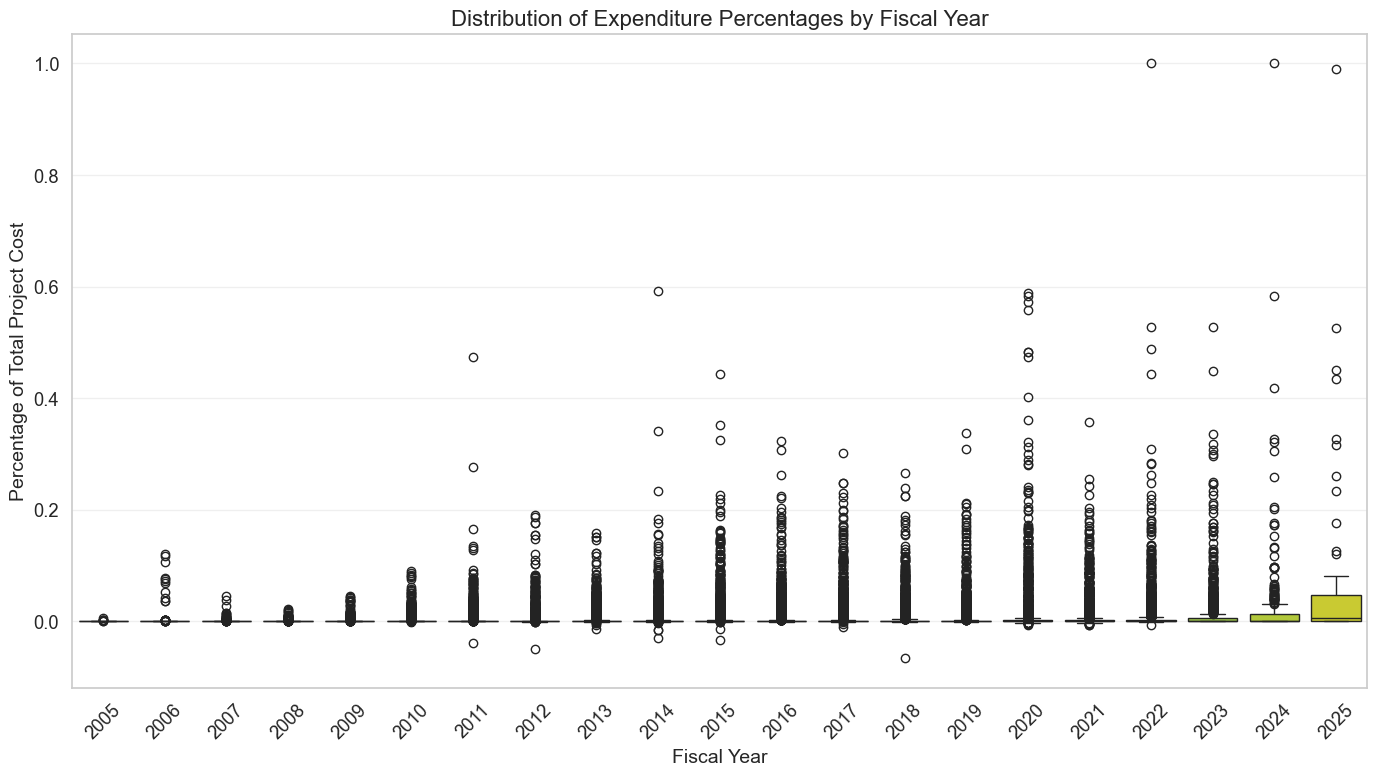

In [10]:
# 3. Box plot showing the distribution of percentage by year
plt.figure(figsize=(14, 8))
sns.boxplot(x='fiscal_year', y='%TPC 95%', data=df, palette='viridis')
plt.title('Distribution of Expenditure Percentages by Fiscal Year', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Percentage of Total Project Cost', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\002931816\AppData\Local\Temp\ipykernel_10752\2631636270.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentage_distribution = df.groupby(['fiscal_year', 'percentage_category']).size().unstack().fillna(0)


<Figure size 1400x800 with 0 Axes>

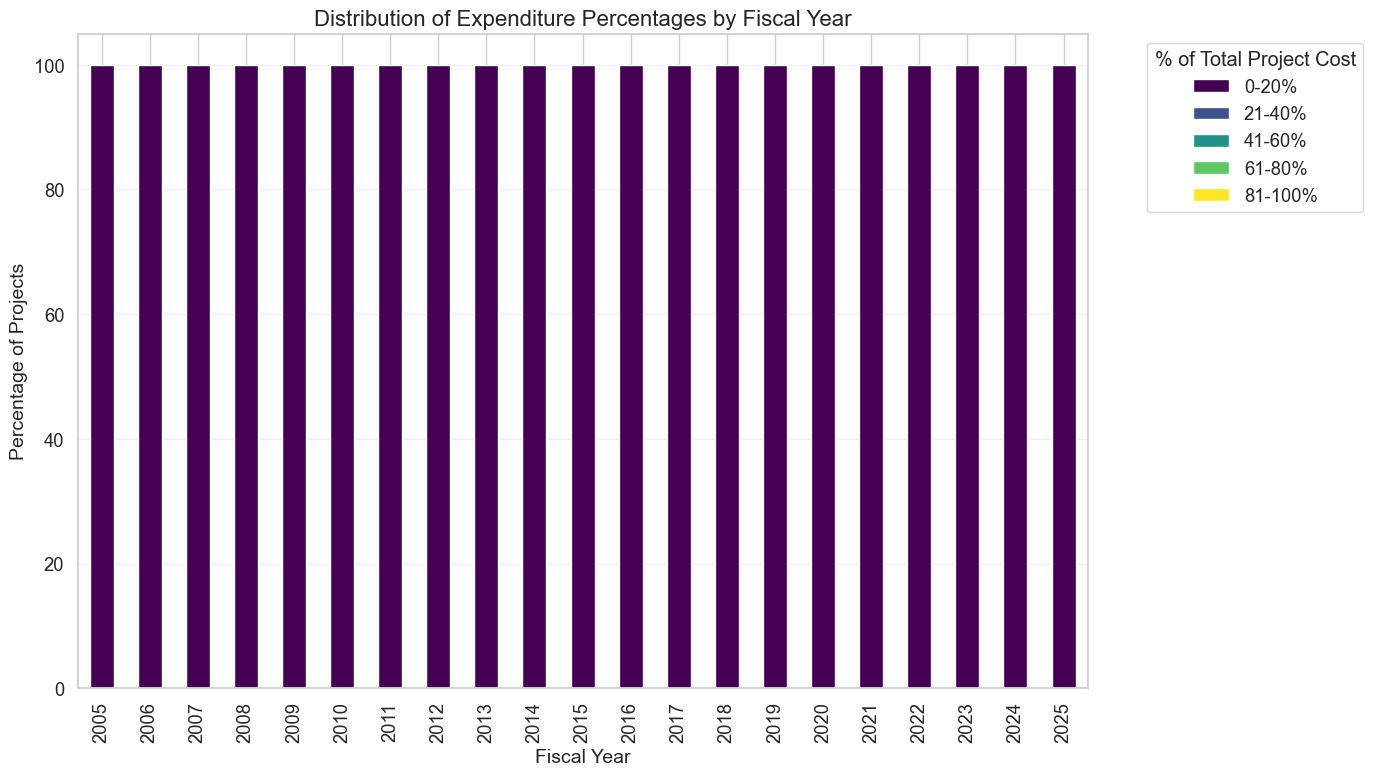

In [13]:
# 2. Stacked bar chart showing percentage composition by year
# First, we need to create categories of expenditure percentages
df['percentage_category'] = pd.cut(df['%TPC 95%'], 
                                  bins=[0, 20, 40, 60, 80, 100],
                                  labels=['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])

percentage_distribution = df.groupby(['fiscal_year', 'percentage_category']).size().unstack().fillna(0)
percentage_distribution_pct = percentage_distribution.div(percentage_distribution.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8))
percentage_distribution_pct.plot(kind='bar', stacked=True, 
                                 colormap='viridis', figsize=(14, 8))
plt.title('Distribution of Expenditure Percentages by Fiscal Year', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Percentage of Projects', fontsize=14)
plt.legend(title='% of Total Project Cost', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

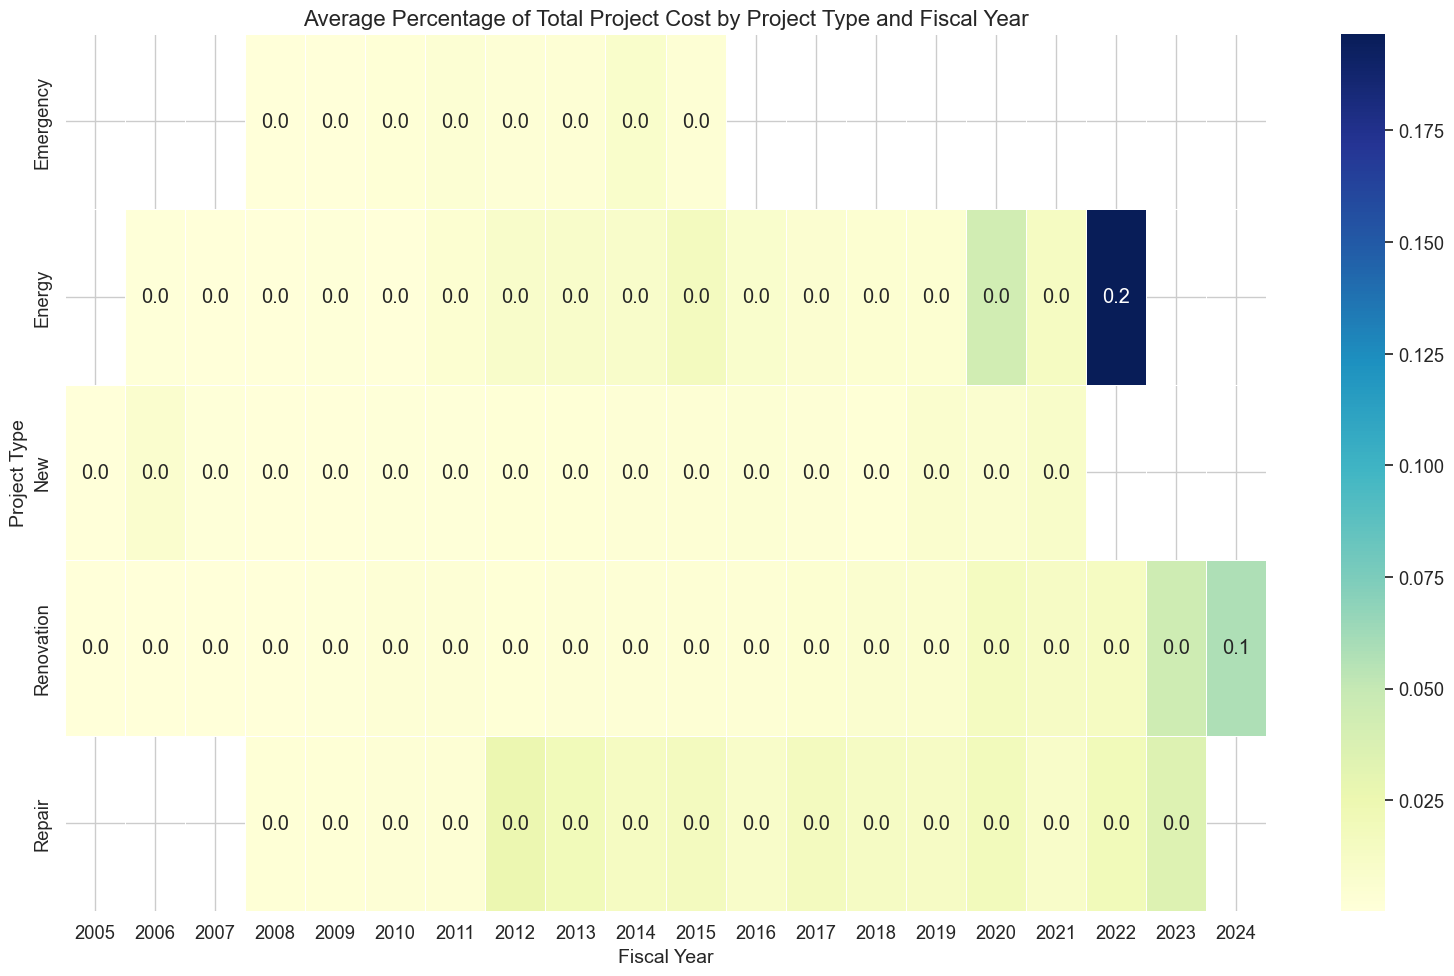

In [15]:
# 5. Heatmap of percentage by project type and year
heatmap_data = df.pivot_table(index='Construction Type', 
                             columns='fiscal_year', 
                             values='%TPC 95%',
                             aggfunc='mean')

plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5)
plt.title('Average Percentage of Total Project Cost by Project Type and Fiscal Year', fontsize=16)
plt.ylabel('Project Type', fontsize=14)
plt.xlabel('Fiscal Year', fontsize=14)
plt.tight_layout()
plt.show()

In [16]:
# 6. Cumulative percentage visualization with Plotly
# Group by year and calculate percentiles
percentiles = [25, 50, 75, 90, 100]
percentile_data = df.groupby('fiscal_year')['%TPC 95%'].quantile(q=[x/100 for x in percentiles]).unstack()
percentile_data.columns = [f'{p}th Percentile' for p in percentiles]
percentile_data = percentile_data.reset_index()

fig = go.Figure()
for column in percentile_data.columns[1:]:
    fig.add_trace(go.Scatter(
        x=percentile_data['fiscal_year'],
        y=percentile_data[column],
        mode='lines+markers',
        name=column
    ))
    
fig.update_layout(
    title='Expenditure Percentage Percentiles by Fiscal Year',
    xaxis_title='Fiscal Year',
    yaxis_title='Percentage of Total Project Cost',
    legend_title='Percentile',
    hovermode='x unified'
)
fig.show()

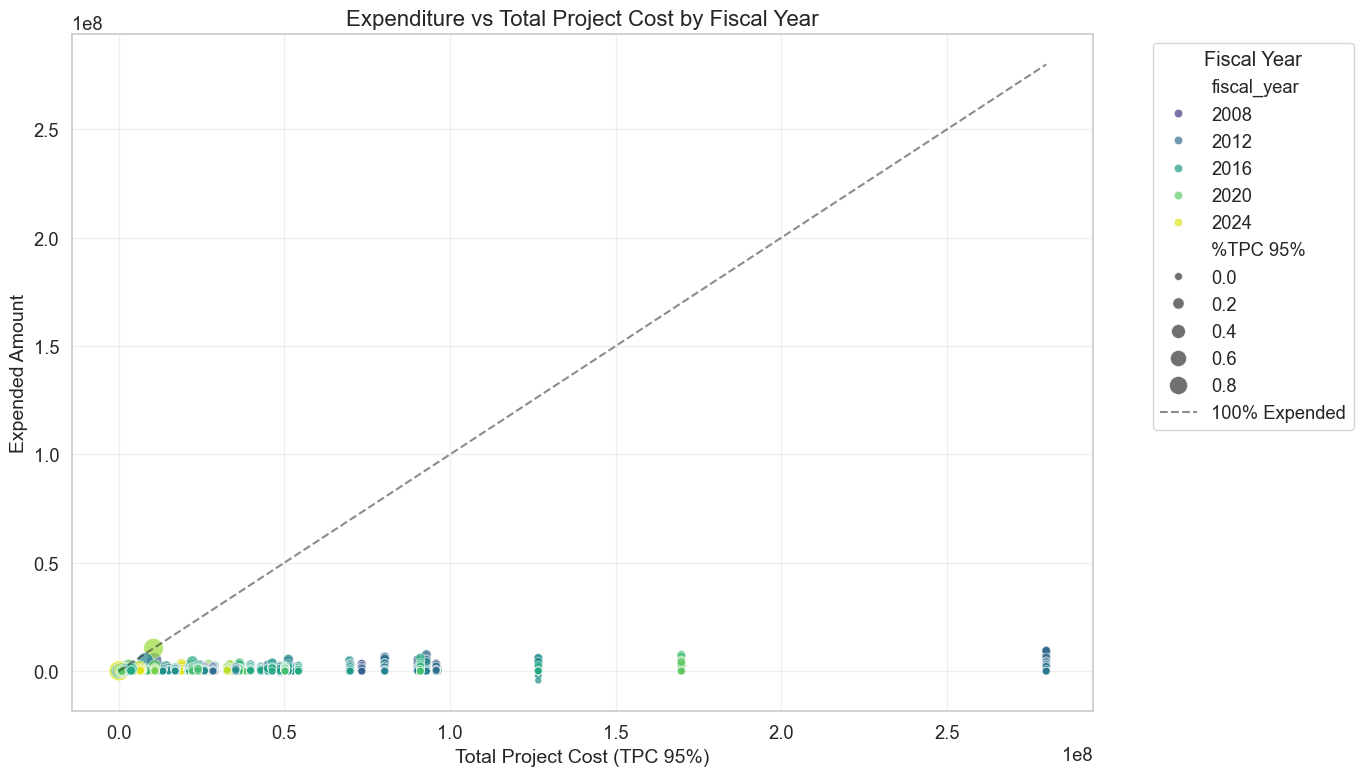

In [7]:
# 11. Expenditure vs Total Project Cost by Fiscal Year
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='TPC 95%', y='Expended', hue='fiscal_year', size='%TPC 95%', 
                sizes=(20, 200), palette='viridis', alpha=0.7)
plt.title('Expenditure vs Total Project Cost by Fiscal Year', fontsize=16)
plt.xlabel('Total Project Cost (TPC 95%)', fontsize=14)
plt.ylabel('Expended Amount', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add a diagonal line representing 100% expenditure
max_val = max(df['TPC 95%'].max(), df['Expended'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, label='100% Expended')
plt.legend(title='Fiscal Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\002931816\AppData\Local\Temp\ipykernel_252\860766114.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fiscal_year', y='%TPC 95%', data=df, palette='viridis')


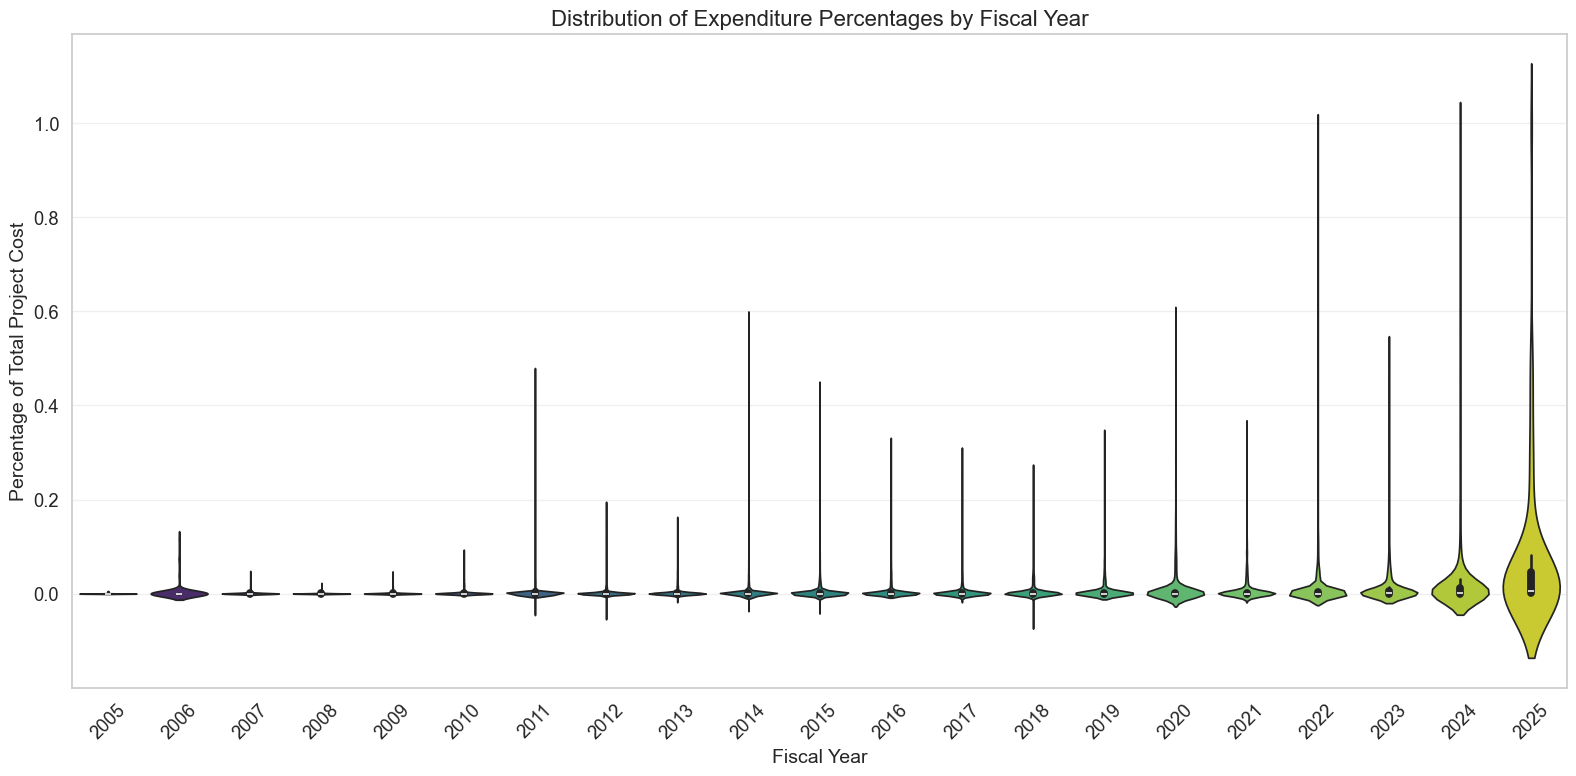

In [8]:
# 9. Violin plot comparing percentage distributions over years
plt.figure(figsize=(16, 8))
sns.violinplot(x='fiscal_year', y='%TPC 95%', data=df, palette='viridis')
plt.title('Distribution of Expenditure Percentages by Fiscal Year', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=14)
plt.ylabel('Percentage of Total Project Cost', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()